## Observations and Insights 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Checking the number of mice.
mice_count = combined_df["Mouse ID"].count()
mice_count

1893

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_df[combined_df.duplicated(['Mouse ID'])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates("Mouse ID" )
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [28]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_df["Mouse ID"].count()
mice_count

249

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats = combined_df.groupby(["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = stats["Tumor Volume (mm3)"].mean()

median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()


variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()


standard_deviation = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()


sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem})
summary_df
# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drugs_total = pd.DataFrame(pd.value_counts(combined_df["Drug Regimen"]))
drugs_total

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Infubinol,178
Ceftamin,178
Propriva,161


## Bar and Pie Charts

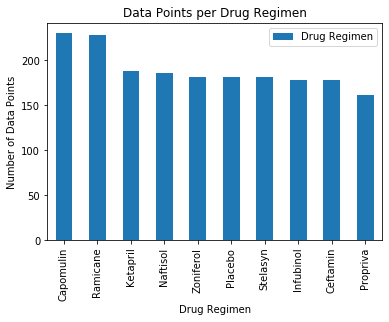

<Figure size 432x288 with 0 Axes>

In [50]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugs_total.plot(kind="bar")
plt.title("Data Points per Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

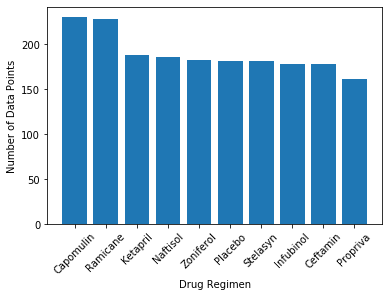

In [51]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = combined_df["Drug Regimen"].value_counts().index
y_axis = combined_df["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis)
plt.xticks(rotation=45)
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()

Text(0.5, 1.0, 'Male vs Female Mice')

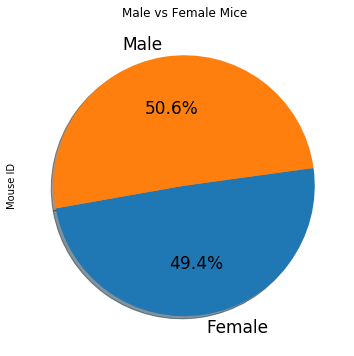

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = pd.DataFrame(combined_df.groupby(["Sex"]).count()).reset_index()
gender_df = gender_df[["Sex","Mouse ID"]]

plt.figure(figsize=(18,6))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=17)

plt.title("Male vs Female Mice")


([<matplotlib.patches.Wedge at 0x7f80e12cbf90>,
 [Text(-0.39947905184848137, -1.0356237188932274, 'Females'),
  Text(0.3958801414714682, 1.0262937754797747, 'Males')],
 [Text(-0.21953353299781408, -0.5691265482206024, '49.4%'),
  Text(0.21593462262080085, 0.5597966048071498, '50.6%')])

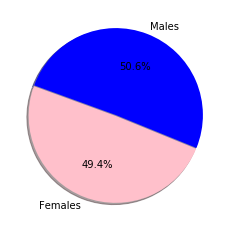

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (combined_df.groupby(["Sex"])["Age_months"].count()).tolist()

labels = ["Females", "Males"]
colors = ["pink", "blue"]
explode = (0.01, 0)

plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)



## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane",:]
infubinol_df = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol",:]
ceftamin_df = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [70]:
# Capomulin - Group by mouse ID and use max to find maximum timepoint for each mouse.
capomulin_max = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_max)

# Merge data into DataFrame
capomulin_merge = pd.merge(capomulin_vol, combined_df, on=("Mouse ID", "Timepoint"),how="left")
capomulin_merge.head()

# Tumor Volume
tumor_capomulin = capomulin_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lower and upper quartiles
quartiles = tumor_capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print("Capomoulin:")
print(f"upper quartile: {upperq}.")
print(f"lower quartile : {lowerq}.")
print(f"The interquartile range of tumor volume is: {iqr}.")
print(f"The median is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

Capomoulin:
upper quartile: 40.1592203.
lower quartile : 32.37735684.
The interquartile range of tumor volume is: 7.781863460000004.
The median is: 38.125164399999996.
Values above 51.83201549 could be outliers.
Values below 20.70456164999999 could be outliers.


In [71]:
# Ramicane - Group by mouse ID and use max to find maximum timepoint for each mouse.
ramicane_max = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_max)

# Merge data into DataFrame
ramicane_merge = pd.merge(ramicane_vol, combined_df, on=("Mouse ID", "Timepoint"),how="left")
ramicane_merge.head()

# Ramicane - Tumor Volume
tumor_ramicane = ramicane_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lower and upper quartiles
quartiles = tumor_ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Ramicane :")
print(f"The upper quartile  is: {upperq}.")
print(f"The lower quartile  is: {lowerq}.")
print(f"The interquartile range of tumor volume is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

Ramicane :
The upper quartile  is: 40.65900627.
The lower quartile  is: 31.56046955.
The interquartile range of tumor volume is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values above 54.30681135 could be outliers.
Values below 17.912664470000003 could be outliers.


In [72]:
# Infubinol - Group by mouse ID and use max to find maximum timepoint for each mouse.
infubinol_max = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_max)

# Merge data into DataFrame
infubinol_merge = pd.merge(infubinol_vol, combined_df, on=("Mouse ID", "Timepoint"),how="left")
infubinol_merge.head()

# Infubinol - Tumor Volume
tumor_infubinol = infubinol_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lower and upper quartiles
quartiles = tumor_infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Infubinol :")
print(f"The upper quartile  is: {upperq}.")
print(f"The lower quartile is: {lowerq}.")
print(f"The interquartile range of tumor volume is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

Infubinol :
The upper quartile  is: 65.52574285.
The lower quartile is: 54.04860769.
The interquartile range of tumor volume is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
Values above 82.74144559000001 could be outliers.
Values below 36.83290494999999 could be outliers.


In [73]:
# Ceftamin - Group by mouse ID and use max to find maximum timepoint for each mouse.
ceftamin_max = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_max)

# Merge data into DataFrame
ceftamin_merge = pd.merge(ceftamin_vol, combined_df, on=("Mouse ID", "Timepoint"),how="left")
ceftamin_merge.head()

# Ceftamin - Tumor Volume
tumor_ceftamin = ceftamin_merge["Tumor Volume (mm3)"]

# Define quartiles, IQR, lower and upper quartiles
quartiles = tumor_ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print("Ceftamin :")
print(f"The upper quartile  is: {upperq}.")
print(f"The lower quartile  is: {lowerq}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.") 
print(f"Values below {lower_bound} could be outliers.")

Ceftamin :
The upper quartile  is: 64.29983003.
The lower quartile  is: 48.72207785.
The interquartile range of tumor volme is: 15.577752179999997.
The median of tumor volume is: 59.85195552.
Values above 87.66645829999999 could be outliers.
Values below 25.355449580000002 could be outliers.


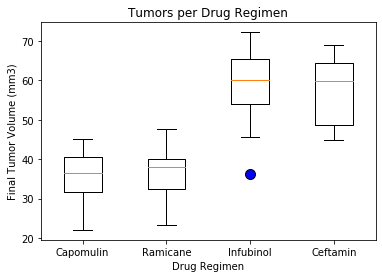

In [74]:
# Box plot for 4 main treatments

box_plot_regimen = [tumor_ramicane, tumor_capomulin, tumor_infubinol, tumor_ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors per Drug Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')

outlier_dot = dict(markerfacecolor='blue',markersize=10)

ax1.boxplot(box_plot_regimen, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",],flierprops=outlier_dot)

plt.show()

## Line and Scatter Plots

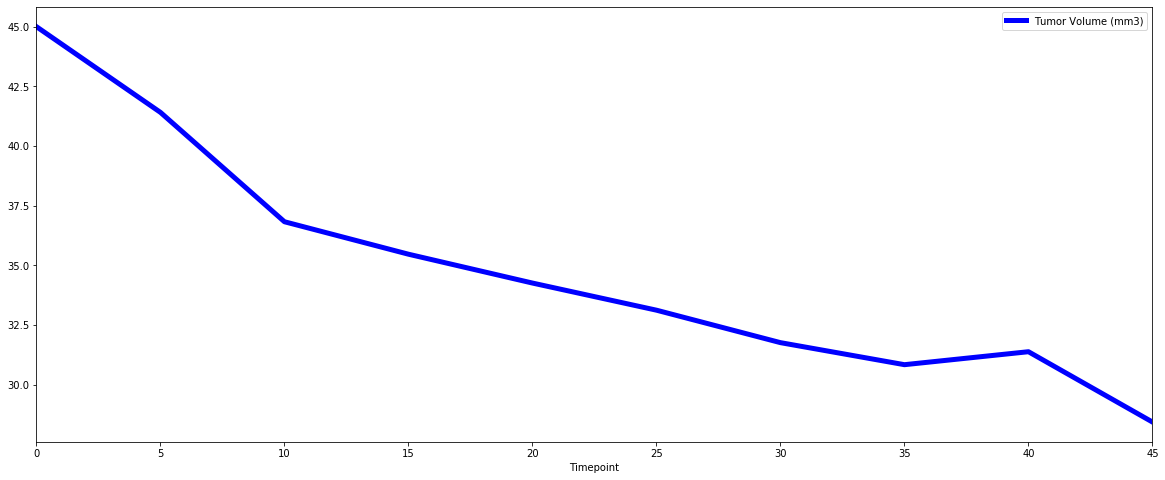

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()

main_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "m601"]

main_mouse = main_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

main_mouse = main_mouse.reset_index(drop=True)
main_mouse.set_index("Timepoint").plot(figsize=(20,8), linewidth=5, color="blue")


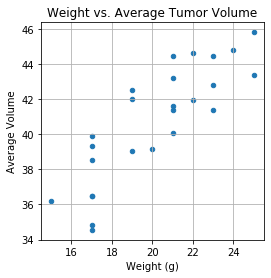

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

weight_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

avg_mouse = pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

avg_mouse = avg_mouse.rename(columns={"Tumor Volume (mm3)": "Average Volume"})

avg_mouse.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")
plt.show()